In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

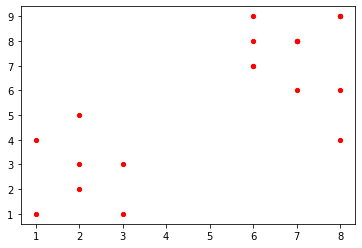

In [2]:
df = pd.read_csv("kmeans.csv")
plt.scatter(df['x'],df['y'], c='r', s=18)

In [3]:
#---let k assume a value---
k = 3

In [4]:
X = np.array(list(zip(df['x'],df['y'])))

In [5]:
#---generate k random points (centroids)---
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size = k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size = k)

In [6]:
#---represent the k centroids as a matrix---
C = np.array(list(zip(Cx, Cy)), dtype=np.float64)
print(C)

[[3. 4.]
 [6. 7.]
 [7. 7.]]


Text(0, 0.5, 'y')

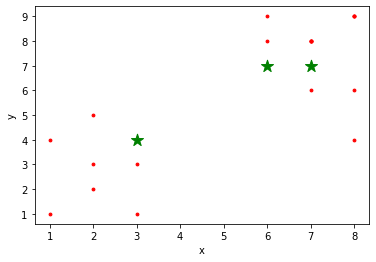

In [7]:
#---plot the orginal points as well as the k centroids---
plt.scatter(df['x'], df['y'], c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")

In [8]:
 from copy import deepcopy

In [9]:
#---to calculate the distance between two points---
def euclidean_distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [10]:
#---create a matrix of 0 with same dimension as C (centroids)---
C_prev = np.zeros(C.shape)

In [11]:
#---to store the cluster each point belongs to---
clusters = np.zeros(len(X))

In [12]:
#---C is the random centroids and C_prev is all 0s---
#---measure the distance between the centroids and C_prev---
distance_differences = euclidean_distance(C, C_prev)

In [13]:
#---loop as long as there is still a difference in
# distance between the previous and current centroids---
while distance_differences.any() != 0:
  #---assign each value to its closest cluster---
  for i in range(len(X)):
    distances = euclidean_distance(X[i], C)
    #---returns the indices of the minimum values along an axis---
    cluster = np.argmin(distances)
    clusters[i] = cluster
  #---store the prev centroids---
  C_prev = deepcopy(C)
  #---find the new centroids by taking the average value---
  for i in range(k): #---k is the number of clusters---
      #---take all the points in cluster i---
      points = [X[j] for j in range(len(X)) if clusters[j] == i]
      if len(points) != 0:
        C[i] = np.mean(points, axis=0) 
  #---find the distances between the old centroids and the new centroids
  distance_differences = euclidean_distance(C, C_prev)



Please regenerate your centroids again.


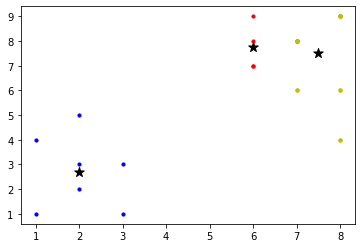

In [14]:
#---plot the scatter plot---
colors = ['b','r','y','g','c','m']
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) > 0:
        plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
else:
    print("Please regenerate your centroids again.")
    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i])
    plt.scatter(C[:, 0], C[:, 1], marker='*', s=100, c='black')

In [15]:
for i, cluster in enumerate(clusters):
 print("Point " + str(X[i]),
 "Cluster " + str(int(cluster)))

Point [1 1] Cluster 0
Point [2 2] Cluster 0
Point [2 3] Cluster 0
Point [1 4] Cluster 0
Point [3 3] Cluster 0
Point [6 7] Cluster 1
Point [7 8] Cluster 2
Point [6 8] Cluster 1
Point [7 6] Cluster 2
Point [6 9] Cluster 1
Point [2 5] Cluster 0
Point [7 8] Cluster 2
Point [8 9] Cluster 2
Point [7 8] Cluster 2
Point [8 9] Cluster 2
Point [6 7] Cluster 1
Point [7 8] Cluster 2
Point [3 1] Cluster 0
Point [8 4] Cluster 2
Point [8 6] Cluster 2
Point [8 9] Cluster 2


In [16]:
print(C)

[[2.         2.71428571]
 [6.         7.75      ]
 [7.5        7.5       ]]


** Using K-Means in Scikit-learn**
 

In [17]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)

In [18]:
kmeans = kmeans.fit(X)

In [19]:
labels = kmeans.predict(X)

In [20]:
centroids = kmeans.cluster_centers_


In [21]:
print(labels)

[1 1 1 1 1 0 0 0 2 0 1 0 0 0 0 0 0 1 2 2 0]


In [22]:
print(centroids)

[[6.90909091 8.18181818]
 [2.         2.71428571]
 [7.66666667 5.33333333]]


**Plot the points and centroids on a scatter plot**

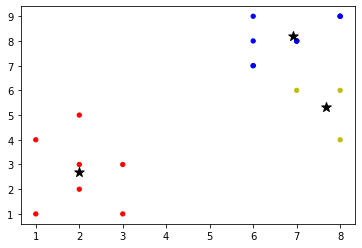

In [23]:
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['x'],df['y'], c=colors, s=18)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')

In [24]:
#---making predictions---
cluster = kmeans.predict([[3,4]])[0]
print(c[cluster]) # r
cluster = kmeans.predict([[7,5]])[0]
print(c[cluster]) # y

r
y


**Calculating the Silhouette Coefficient**

In [25]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(X, kmeans.labels_)
print(silhouette_samples)
print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())

[0.67534567 0.73722797 0.73455072 0.66254937 0.6323039  0.29124047
 0.65958544 0.56877212 0.30782271 0.58882096 0.51065918 0.65958544
 0.58208055 0.65958544 0.58208055 0.29124047 0.65958544 0.60168807
 0.52022287 0.42808391 0.58208055]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.5683386570049157


In [26]:
print("Silhouette mean:", metrics.silhouette_score(X, kmeans.labels_))

Silhouette mean: 0.5683386570049157


**Finding the Optimal K**

In [27]:
silhouette_avgs = []
min_k = 2

Silhouette Coefficients for k = 2 is 0.704998665863519
Silhouette Coefficients for k = 3 is 0.5683386570049157
Silhouette Coefficients for k = 4 is 0.4643763365584561
Silhouette Coefficients for k = 5 is 0.48164708359899294
Silhouette Coefficients for k = 6 is 0.4510868368246578
Silhouette Coefficients for k = 7 is 0.4311618287753457
Silhouette Coefficients for k = 8 is 0.49229994479708
Silhouette Coefficients for k = 9 is 0.4737113275591361
Silhouette Coefficients for k = 10 is 0.5588483560001315
Silhouette Coefficients for k = 11 is 0.52007489882161
Silhouette Coefficients for k = 12 is 0.4942228407828742
Silhouette Coefficients for k = 13 is 0.4802755446489002
Silhouette Coefficients for k = 14 is 0.4425187247054025
Silhouette Coefficients for k = 15 is 0.42857142857142855
Silhouette Coefficients for k = 16 is 0.42857142857142855


<ipython-input-28-1933b1c0c7c4>:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)
<ipython-input-28-1933b1c0c7c4>:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


Silhouette Coefficients for k = 17 is 0.42857142857142855


<ipython-input-28-1933b1c0c7c4>:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


Silhouette Coefficients for k = 18 is 0.42857142857142855


<ipython-input-28-1933b1c0c7c4>:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


Silhouette Coefficients for k = 19 is 0.42857142857142855
Silhouette Coefficients for k = 20 is 0.42857142857142855
Optimal K is  2


<ipython-input-28-1933b1c0c7c4>:3: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  kmean = KMeans(n_clusters=k).fit(X)


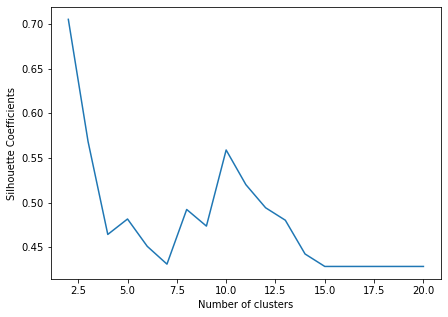

In [28]:
#---try k from 2 to maximum number of labels---
for k in range(min_k, len(X)):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(X)), silhouette_avgs)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K) 

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
df = pd.read_csv("BMX_G.csv") 

In [30]:
print(df.shape)

(9338, 27)


In [31]:
df.isnull().sum()

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [32]:
df = df.dropna(subset=['bmxleg','bmxwaist']) # remove rows with NaNs
print(df.shape)

(6899, 27)


Text(0, 0.5, 'Waist Circumference (cm)')

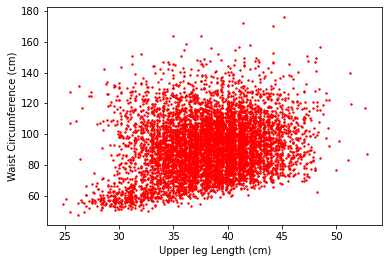

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df['bmxleg'],df['bmxwaist'], c='r', s=2)
plt.xlabel("Upper leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")

**Clustering Using K-Means**

In [34]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans

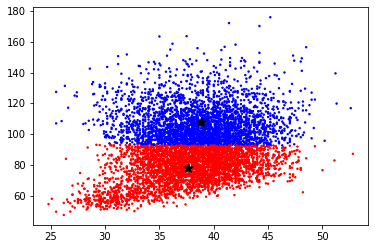

In [35]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k = 2
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black') 


In [36]:
 print(centroids)

[[ 38.82285804 108.01754221]
 [ 37.65963253  77.92926236]]


 **Finding the Optimal Size Classes**

In [37]:
from sklearn import metrics
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K) 

Silhouette Coefficients for k = 2 is 0.5165248081633523
Silhouette Coefficients for k = 3 is 0.47298578166673944
Silhouette Coefficients for k = 4 is 0.43631954781182336
Silhouette Coefficients for k = 5 is 0.4192036614159393
Silhouette Coefficients for k = 6 is 0.39398964097689626
Silhouette Coefficients for k = 7 is 0.37937527609237137
Silhouette Coefficients for k = 8 is 0.35821274077331067
Silhouette Coefficients for k = 9 is 0.34140212648340507
Optimal K is 2


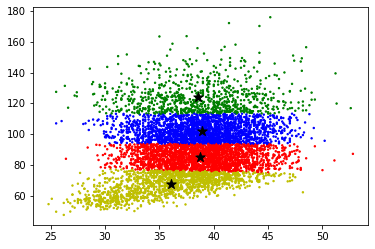

In [38]:
#trying with k=4
k = 4
X = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black') 